![](img/logo.png)

# K-nearest neighbors
## Yoav Ram

# Supervised learning

Supervised learning consists in learning the link between two datasets: the observed data `X` and an external variable `y` that we are trying to predict, usually called “target” or “labels”. 

$$
X \to Y
$$

There are two fundamental supervised learning problems: regression and classification.
In classification, we need to predict a (discrete) class.
In regression, we need to predict a number.

We start with classification. In this case, _X_ can be anything, and _Y_ is a category (cat, dog, etc.) encoded as an integer (0, 1, etc.)

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.simplefilter('ignore', FutureWarning)
warnings.simplefilter('ignore', UserWarning)

import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

# conda install -c districtdatalabs yellowbrick
from yellowbrick.contrib.classifier import DecisionViz
from yellowbrick.regressor import prediction_error
from yellowbrick.model_selection import learning_curve

red, blue, green = sns.color_palette('Set1', 3)
sns.set(
    style='ticks',
    context='talk',
    palette='Set1'
)

# Scikit-learn

[![scikit-learn logo](http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)](http://scikit-learn.org/)

*Scikit-learn* is a Python package for machine learning:

- Simple and efficient tools for data mining and data analysis
- Accessible to everybody, and reusable in various contexts
- Built on NumPy, SciPy, and matplotlib
- Open source, commercially usable - BSD license

# Iris dataset

[Fisher's Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) is a classification task consisting in identifying 3 different types of irises (Setosa, Versicolour, and Virginica) from their petal and sepal length and width.

![Iris virginica](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/330px-Iris_virginica.jpg)

Let's start by loading the dataset.

In [3]:
X, y = sklearn.datasets.load_iris(return_X_y=True)
feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

df = pd.DataFrame(data=X, columns=feature_names)
df['target'] = y
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

**Training set and testing set.** 
While experimenting with any learning algorithm, it is important not to test the prediction of an estimator on the data used to fit the estimator as this would not be evaluating the performance of the estimator on new data. This is why datasets are often split into train and test data.

Split the dataset to train and test data using a random permutation - this is easily done with functions from the `model_selection` module, which has many methods to split datasets. We'll use a very simple one, `train_test_split` which just splits that data by sampling a fraction of the rows to the training set and the rest to the test set (without replacement).

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# Classification

The simplest possible classifier is the **nearest neighbor**: given a new observation, find in the training set (i.e. the data used to train the estimator) the observation with the closest feature vector.

For example, if we have examples of red triangles and blue squares, how would we classify the green circle? Is it a triangle or a square?
![KNN](img/knn.png)

All supervised estimators in *scikit-learn* implement a `fit(X, y)` method to fit the model and a `predict(X)` method that, given unlabeled observations `X`, returns the predicted labels `y`.

Import the nearest-neighbor classifier, then create and fit it:

In [5]:
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train) 

KNeighborsClassifier()

Predict the labels (Iris species) for the test data and compare with the real labels:

In [6]:
y_hat = classifier.predict(X_test)
print(y_hat)
print(y_test)
print('Accuracy:', classifier.score(X_test, y_test))

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0 1 2 2 2 2]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 2 2]
Accuracy: 0.98


# Reduce dimensions

To reduce the dimensionality of the problem (4 features - 4D) we can use *Seaborn*'s `pariplot` to look at the joint distributions of each pair of features.

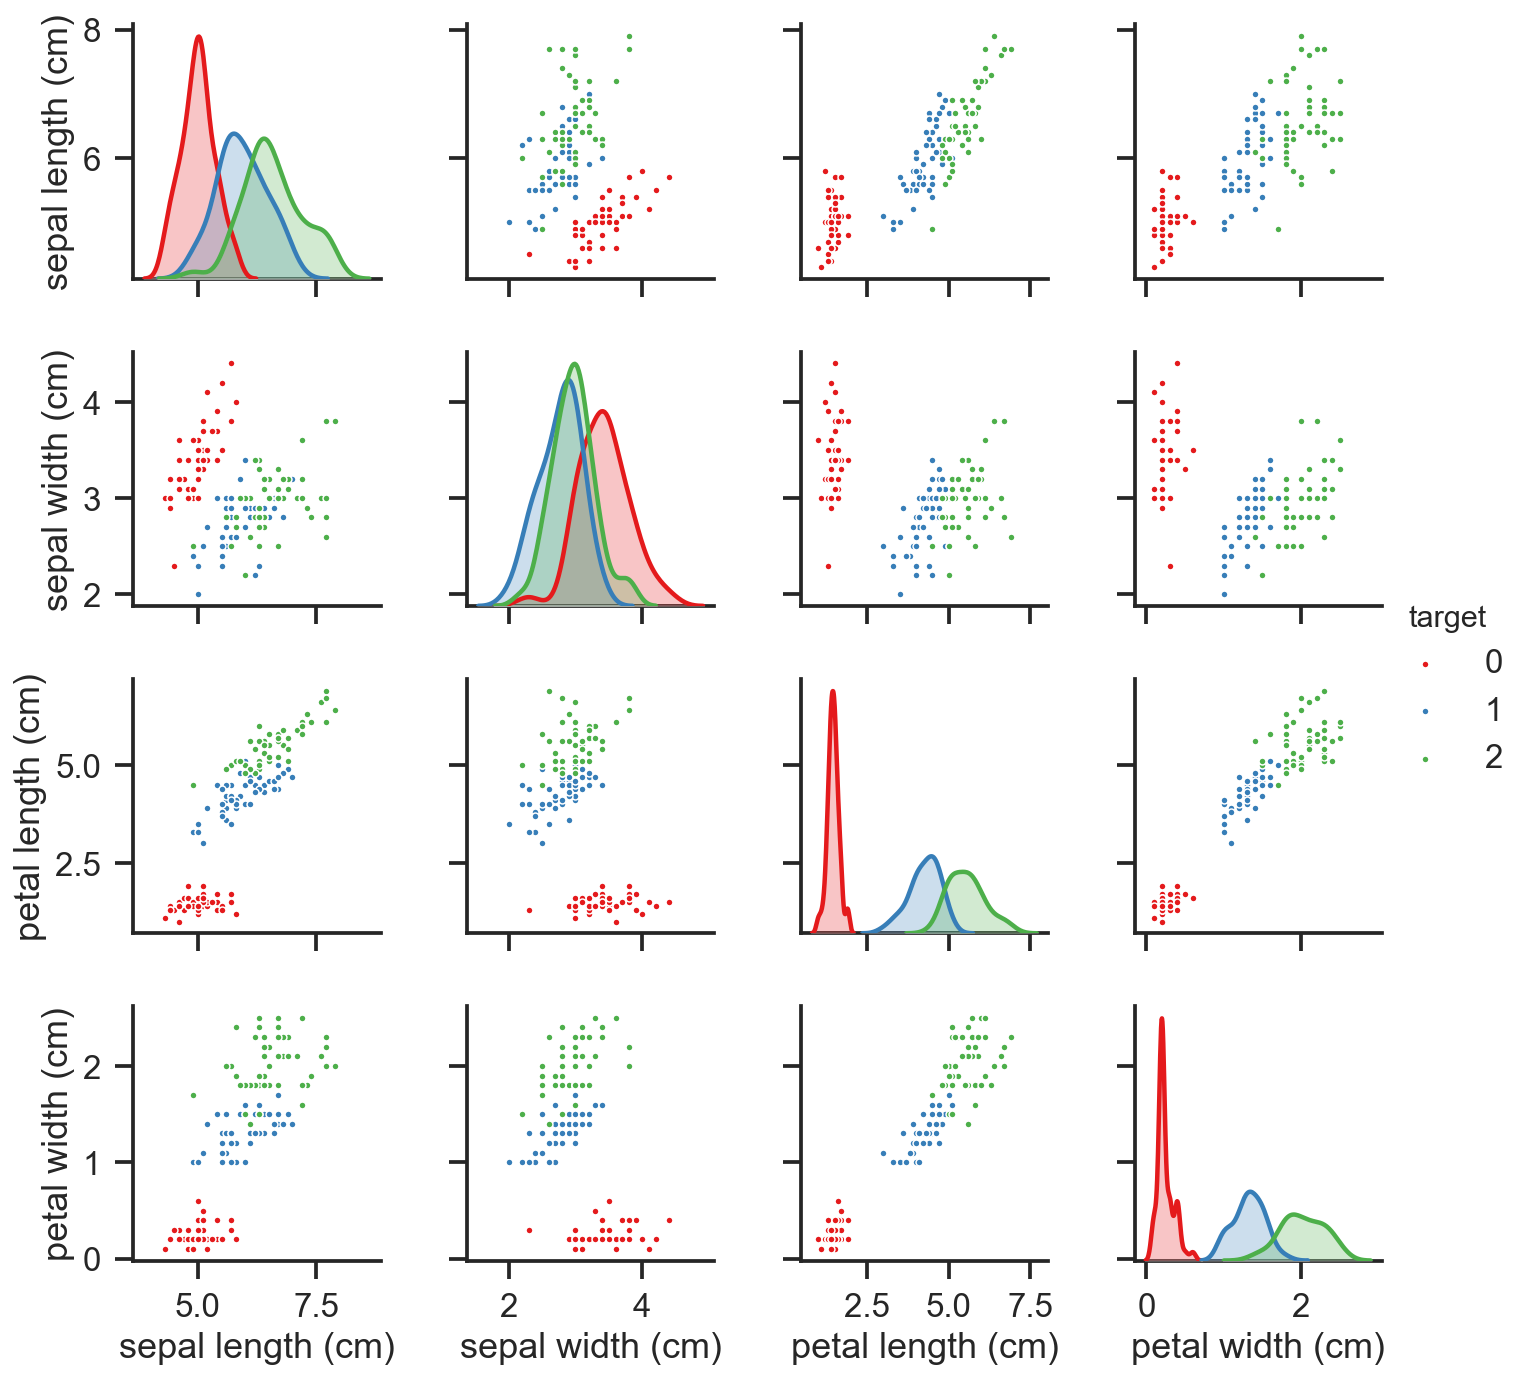

In [7]:
sns.pairplot(df, vars=feature_names, hue='target', 
             plot_kws={'s': 12});

From this figure it seems like using just the petal (last two columns in our features matrix) will do a produce a good separation between blue and others, and a decent one between green and red.

Let's try it.

In [8]:
X_train = X_train[:, 2:]
X_test = X_test[:, 2:]

In [9]:
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

y_hat = classifier.predict(X_test)
print(y_hat)
print(y_test)
print('Accuracy:', classifier.score(X_test, y_test))

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 1 2]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 2 2]
Accuracy: 0.98


We didn't gain or lose any accuracy, but that's expected as the test set size is just 50.

But as we are now in 2D, we can plot the classifier decision boundaries using [Yellowbrick](https://www.scikit-yb.org/en/latest/gallery.html)'s [`DecisionViz`](https://www.scikit-yb.org/en/latest/api/contrib/boundaries.html) visualizer.

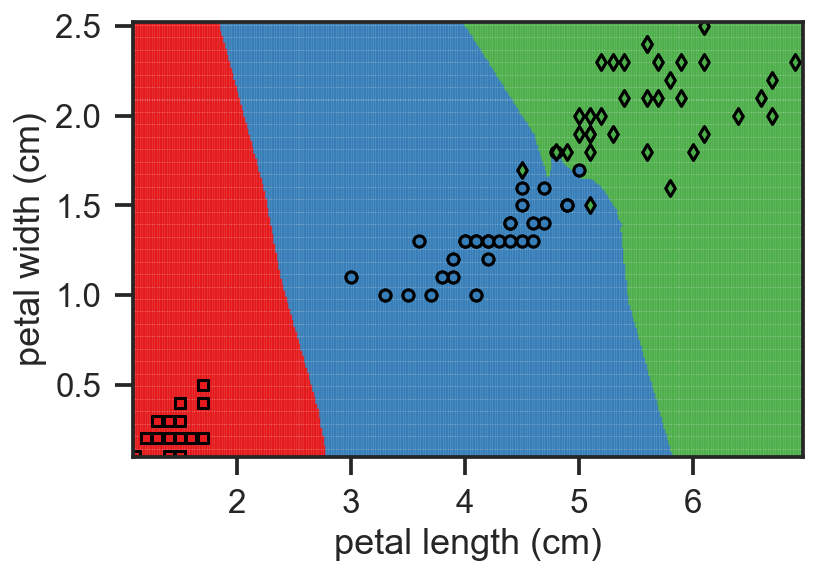

In [17]:
viz = DecisionViz(KNeighborsClassifier(), 
                  markers='o', pcolormesh_alpha=0.7)
viz.fit(X_train, y_train)
viz.draw(X_train, y_train)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3]);

# Exercise: Classifying handwritten digits 

Learning to recognize handwritten digits with a K-nearest neighbors classifier, inspired by [IPython Interactive Computing and Visualization Cookbook](http://ipython-books.github.io/).

Start by looking at the data.

What do we have here?

In [66]:
X, y = sklearn.datasets.load_digits(return_X_y=True)
X.shape, y.shape

((1797, 64), (1797,))

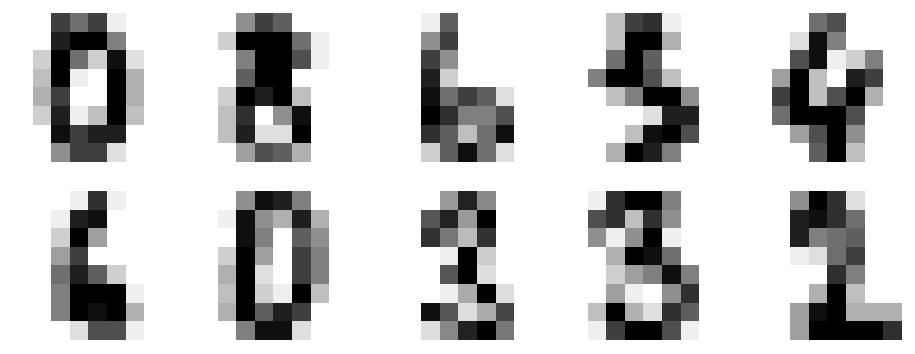

In [67]:
fig, axes = plt.subplots(2, 5, figsize=(8, 3))
for ax in axes.flat:
    idx = np.random.choice(np.arange(X.shape[0]))
    ax.matshow(X[idx].reshape(8, 8), cmap='gray_r')
    ax.set(xticks=[], yticks=[])
sns.despine(left=True, bottom=True)

We can also look at the average image for each class, this should tell us if there is enonugh signal in the data to be learned from. 

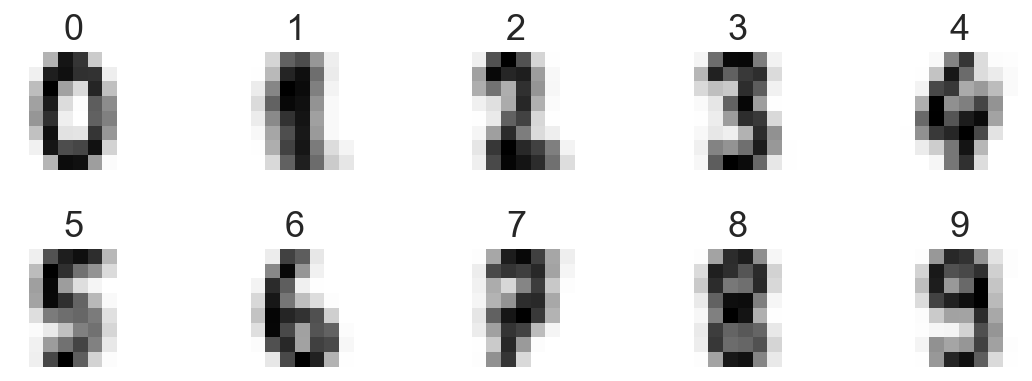

In [68]:
fig, axes = plt.subplots(2, 5, figsize=(8, 3))
for k, ax in enumerate(axes.flat):
    idx = y == k 
    X_k_mean = X[idx].mean(axis=0) 
    ax.imshow(X_k_mean.reshape((8, 8)), cmap='gray_r')
    ax.set(title=k, xticks=[], yticks=[])
sns.despine(bottom=True, left=True)
fig.tight_layout()

OK, so lets **split the data** and **train a KNN classifier**. Then **print the score**.

Remember that the [solution](../solutions/KNN.ipynb) is available.

In [78]:
# YOUR CODE HERE


In [79]:
# YOUR CODE HERE

Test accuracy: 0.9778


## Confusion matrix

We can use [yellowbrick](https://www.scikit-yb.org/) to plot a [confusion matrix](https://www.scikit-yb.org/en/latest/api/classifier/confusion_matrix.html) to understand where the confusion is: which classes are mistaken for which?

In [70]:
from yellowbrick.classifier import ConfusionMatrix, confusion_matrix

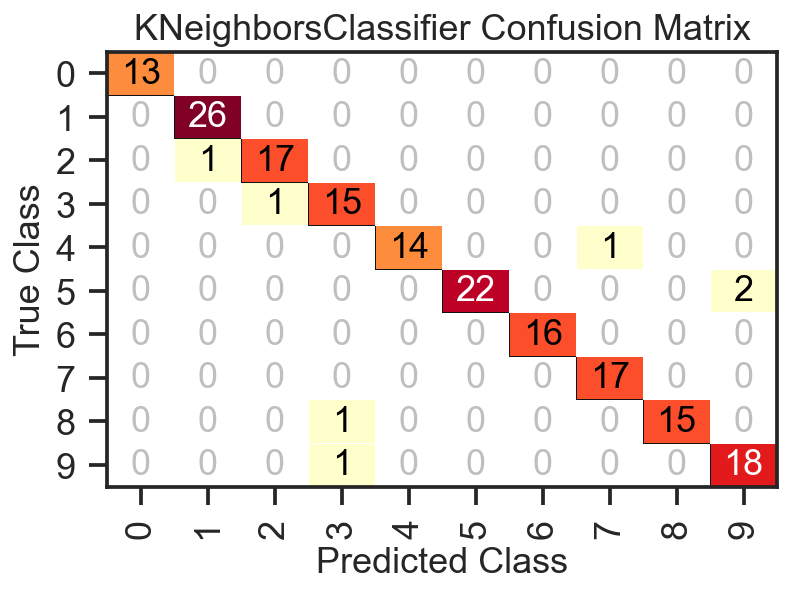

In [80]:
confusion_matrix(classifier, X_test, y_test);

We can see that there are only a few mistakes: 8 and 9 classified as 3, 4 as 7, 5 as 5, 2, as 1, and 3 as 2.

# Regression

Now we try to predict a continuous variable $y$ 

We'll work with the diabetes dataset:
> Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

In [18]:
X, y = sklearn.datasets.load_diabetes(return_X_y=True)
feature_names = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
n_features = len(feature_names)

df = pd.DataFrame(data=X, columns=feature_names)
df['target'] = y
df.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019908 -0.017646   151.0  
1 -0.039493 -0.068330 -0.092204    75.0  
2 -0.002592  0.002864 -0.025930   141.0  
3  0.034309  0.022692 -0.009362   206.0  
4 -0.002592 -0.031991 -0.046641   135.0

Let's look at the features (`X`):

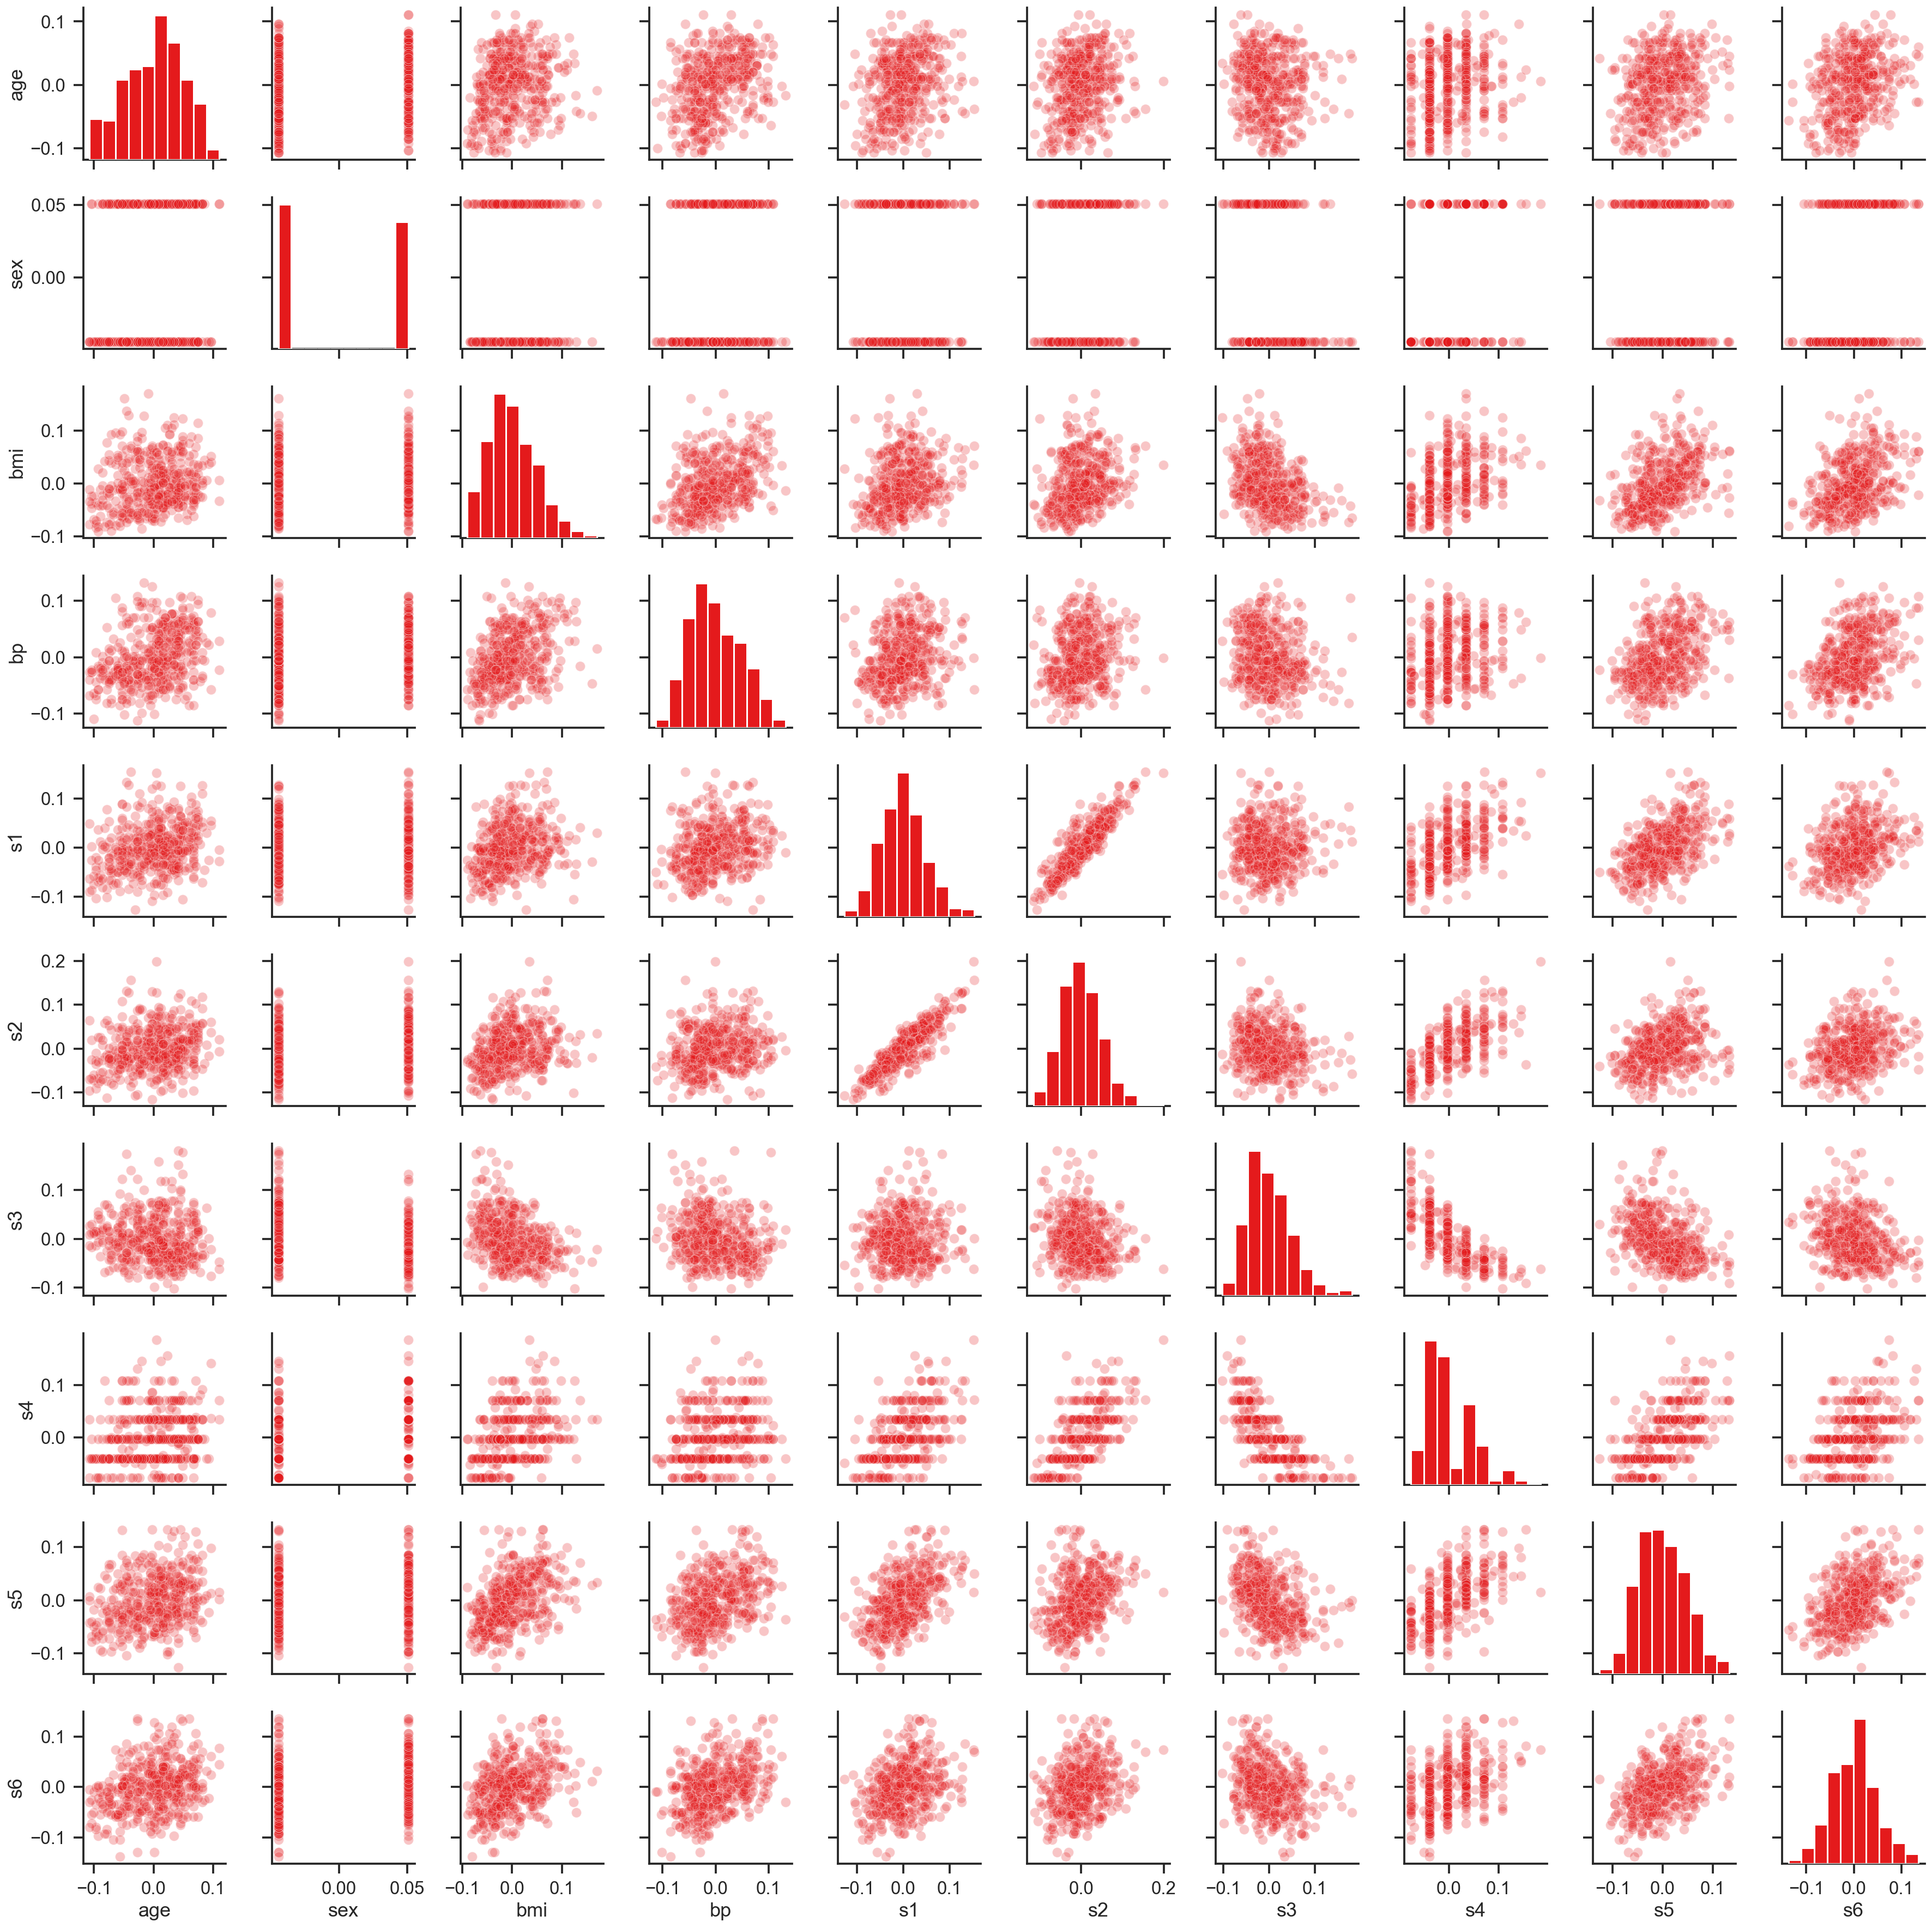

In [19]:
df = pd.DataFrame(data=X, columns=feature_names)
sns.pairplot(df, plot_kws=dict(alpha=0.25));

Let's look at the distribution of the target (`y`):

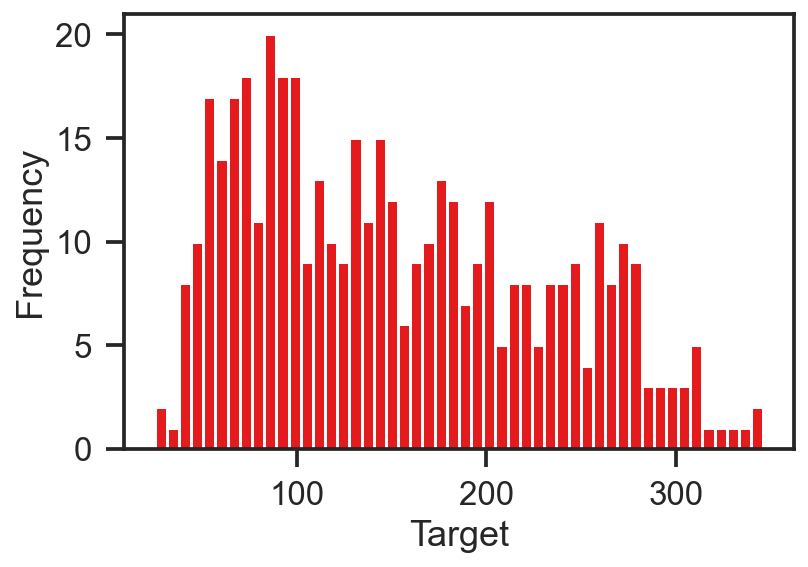

In [20]:
plt.hist(y, bins=50)
plt.xlabel('Target')
plt.ylabel('Frequency');

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Let's use a k-nearest neighbors model to do regression.
In this case the predicted value is a weighted average of the neighbors.

Lets run the regression and print the model score.
For regression we usually use $R^2$ -- the fraction of variance in the target explained by the model.

In [23]:
regressor = KNeighborsRegressor()
regressor.fit(X_train, y_train)
y_hat = regressor.predict(X_test)
score = regressor.score(X_test, y_test)
print('R2 = {:.2f}'.format(score))

R2 = 0.19


How good is the model? We can use Yellowbrick to plot a diagnostic plot: a **prediction error plot**. 
This plot shows the prediction $\hat{y}$ vs the truth $y$.
We see both the train data (red) and the test data (blue).
The faded line is a $y'=y$ line, which is where we want the points to be.
The bold line is a linear fit through the blue points; we'd like it to be close to the faded line.

We can conclude that the predictions are over-estimating when $y<150$ or so, and under-estimating when $y>150$; and this seems true for both the train (red) and test (blue) sets.

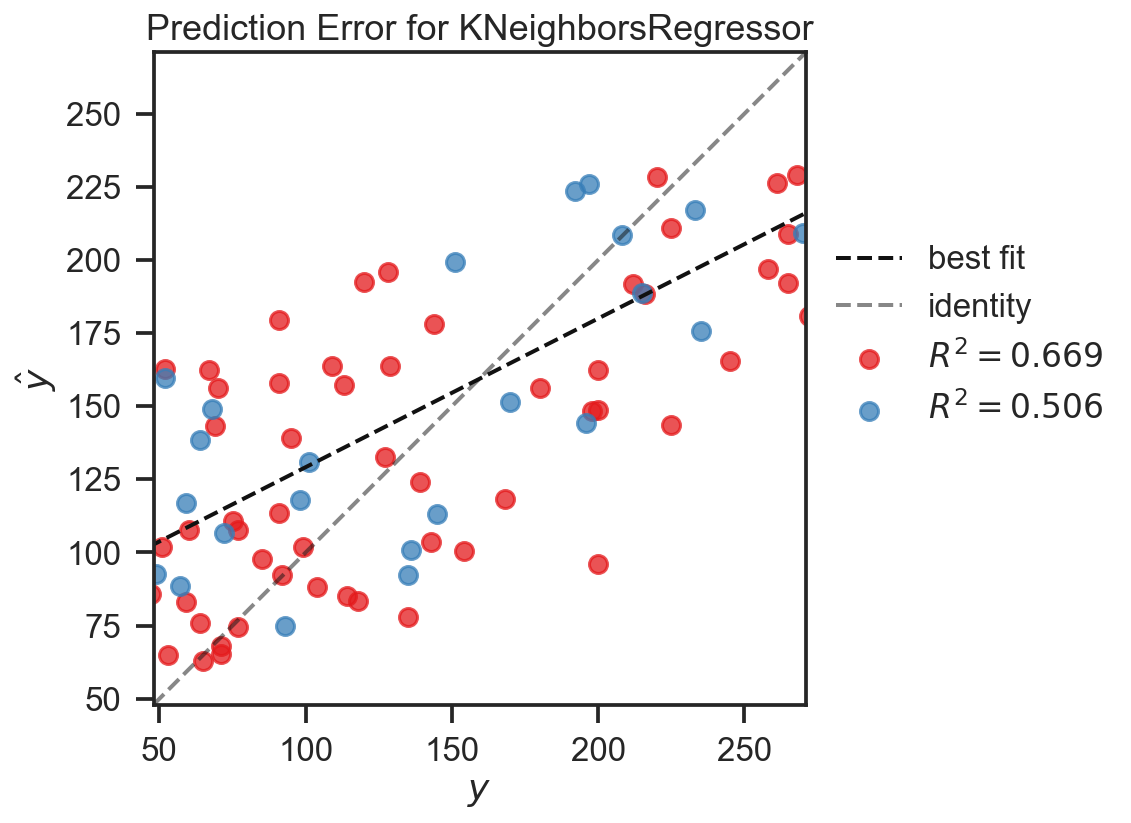

In [56]:
plt.figure(figsize=(6, 6))
prediction_error(regressor, X_train, y_train,  bestfit=False, identity=False)
prediction_error(regressor, X_test, y_test)
plt.legend(bbox_to_anchor=(1, 0.75));

An interesting question that may aris is: "Do we have enough data?" 

To tackle this, we can try to look at the score of the model with increasing amount of samples, and see if the score has saturated (stabilized), or is still increasing.

This is called a learning curve, and to plot it we apply [Yellowbrick](https://www.scikit-yb.org/en/latest/api/model_selection/learning_curve.html).

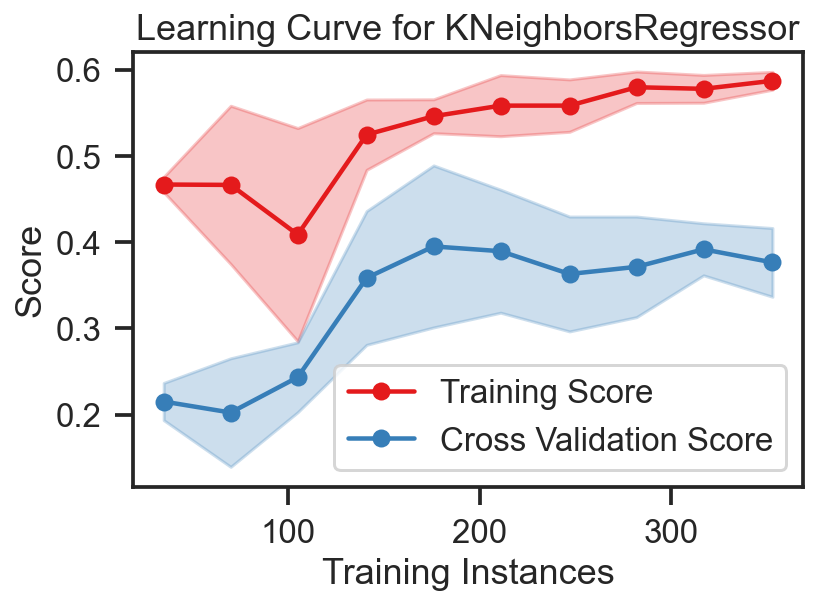

In [65]:
learning_curve(KNeighborsRegressor(), X, y, 
               train_sizes=np.arange(0.1, 1.1, 0.1));

It looks like we have enough sample, and could actually be satisfied with even less - about 200-250.

# References

- Scikit-learn [supervised learning tutorial](http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html).
- [Tuning meta-parameters](http://scikit-learn.org/stable/modules/grid_search.html#grid-search) with cross validation.
- [Yellowbrick gallery](https://www.scikit-yb.org/en/latest/gallery.html)


# Colophon
This notebook was written by [Yoav Ram](http://python.yoavram.com).

The notebook was written using [Python](http://python.org/) 3.7.
Dependencies listed in [environment.yml](../environment.yml).

This work is licensed under a CC BY-NC-SA 4.0 International License.

![Python logo](https://www.python.org/static/community_logos/python-logo.png)